In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

# Context

In [122]:
dataset = pd.read_csv('train.csv')

In [ ]:
dataset.info()

# Data quality assessment

In [123]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [124]:
dataset.shape

(100000, 12)

Поскольку мы хотим вообще узнать что влияет на выживаемость пассажиров нашего "Титаника", мы можем избиваться от столбцов, которые по моему мнению не могут повлиять на выживаемость. я выбрал Name, Ticket, Cabin, Embarked

In [126]:
dataset = dataset.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Sex          100000 non-null  object 
 4   Age          96708 non-null   float64
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
 7   Fare         99866 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 6.1+ MB


Теперь нам надо необходимо избавиться от значений Nan, собственно я это решил делать заменой Нанов на среднее значение по датасету для определенного столбца, как мы видим из инфы нашего датасета, это необходимо проделать для столбцов Age и Fare

In [131]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())

In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Sex          100000 non-null  object 
 4   Age          100000 non-null  float64
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
 7   Fare         100000 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 6.1+ MB


Теперь наш датасет готов к тому чтобы работать с ним

# Data exploration

In [127]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


Как мы видим по описательному анализу выжило у нас 42.77% пассажиров, средний возраст всех пассажиров составил 38,4 года, средняя стоимость билета была 43,92 деняг (пусть будут доллары)
Однако нам интересно найти какие-либо зависимости которые помогли пассажирам вижить а не пойти на корм акулам, поэтому мы анализируем дальше
Я решил что сначала надо понять насколько зажравшиеся господы 1-го класса более выживаемы чем обычные работяги 3-го класса

In [157]:
piv_class = dataset.pivot_table('PassengerId', 'Pclass', 'Survived', 'count')

Survived,0,1
Pclass,,
1,12739,17576
2,13622,15057
3,30865,10141


<AxesSubplot:title={'center':'Surviving by class'}, xlabel='Passenger class', ylabel='Count'>

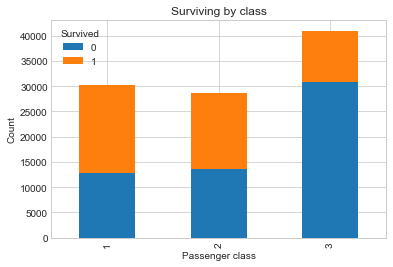

In [154]:
piv_class.plot(kind='bar',stacked = True, title = 'Surviving by class', ylabel = 'Count', xlabel = 'Passenger class')

In [169]:
piv_class_sum = piv_class.sum(axis = 1)
survive_ratio = round(((piv_class.iloc[:,1] / piv_class_sum) * 100),2)
print(f'Survive ratio for passengers by class is: 1-st class - {survive_ratio[1]}%, 2-nd class - {survive_ratio[2]}%, 3-rd class - {survive_ratio[3]}%')

Survive ratio for passengers by class is: 1-st class - 57.98%, 2-nd class - 52.5%, 3-rd class - 24.73%


Теперь мы хотим узнать насколько более везучие у нас женщины, для этого мы проделываем то же самое, только не для класса пассажира, а для пола

In [165]:
piv_sex = dataset.pivot_table('PassengerId', 'Sex', 'Survived', 'count')
piv_sex

Survived,0,1
Sex,,
female,12660,31226
male,44566,11548


<AxesSubplot:title={'center':'Surviving by sex'}, xlabel='Passenger class', ylabel='Count'>

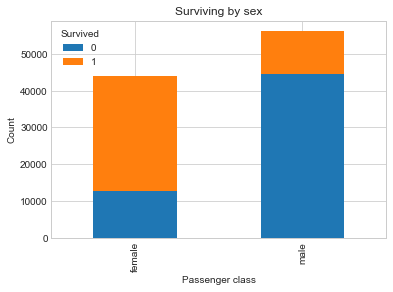

In [163]:
piv_sex.plot(kind='bar',stacked = True, title = 'Surviving by sex', ylabel = 'Count', xlabel = 'Passenger sex')

In [170]:
piv_sex_sum = piv_sex.sum(axis = 1)
survive_ratio_sex = round(((piv_sex.iloc[:,1] / piv_sex_sum) * 100),2)
print(f'Survive ratio for passengers by sex is: Female - {survive_ratio_sex[0]}%, Male - {survive_ratio_sex[1]}%')

Survive ratio for passengers by sex is: Female - 71.15%, Male - 20.58%


На данном этапе мы выяснили, что лучше быть пассажиров женщиной которая может себе позволить билет 1-го класса, но теперь давайте разберемся что насчет семейства? лучше быть с ними или отправиться в путешествие на титанике в одиночку?

In [177]:
piv_sibl = dataset.pivot_table('PassengerId', 'SibSp', 'Survived', 'count')
piv_parch = dataset.pivot_table('PassengerId', 'Parch', 'Survived', 'count')

<AxesSubplot:title={'center':'Parents/Children'}, xlabel='Parch'>

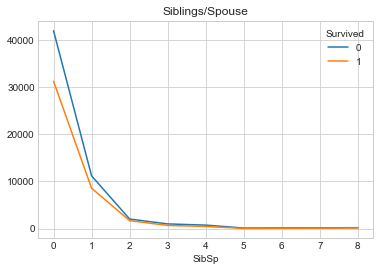

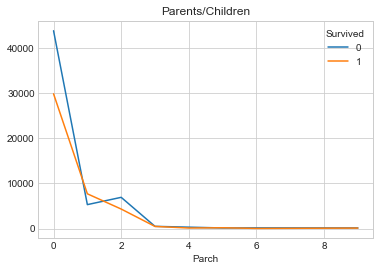

In [178]:
piv_sibl.plot( title='Siblings/Spouse')
piv_parch.plot( title='Parents/Children')

Собственно из этих графиков и видно, что чем больше у тебя родственников\детей\жен тем меньше вероятность у тебя спастись
Дальше надо разобраться с возрастом. Так как возрастов слишком много (непрерывная величина, как никак) намного проще разбить данный признак на некоторое количество групп, я решил что у меня этих групп будет 4

In [214]:
age_gr = dataset.groupby(['PassengerId', 'Survived'])['Age'].sum().reset_index()
dead = age_gr[age_gr.Survived == 0]
alive = age_gr[age_gr.Survived == 1]

<AxesSubplot:ylabel='Frequency'>

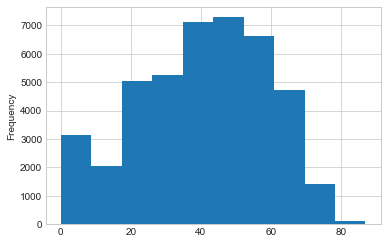

In [215]:
alive['Age'].plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

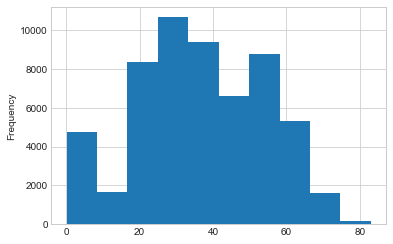

In [216]:
dead['Age'].plot(kind='hist')

In [217]:
children = dataset[dataset['Age']<=16]
juvenile = dataset[(dataset['Age'] > 16) & (dataset['Age'] < 25)]
adults = dataset[(dataset['Age']>=25)&(dataset['Age']<60)]
old = dataset[dataset['Age']>=60]

In [222]:
children_survived_sum = children[children.Survived == 1]['Survived'].sum()
juvenile_survived_sum = juvenile[juvenile.Survived == 1]['Survived'].sum()
adults_survived_sum = adults[adults.Survived == 1]['Survived'].sum()
old_survived_sum = old[old.Survived == 1]['Survived'].sum()

5061

In [226]:
surv_by_age_ratio_ch = (children_survived_sum/len(children) *100)
surv_by_age_ratio_ju = (juvenile_survived_sum/len(juvenile) *100)
surv_by_age_ratio_ad = (adults_survived_sum/len(adults) *100)
surv_by_age_ratio_old = (old_survived_sum/len(old) *100)
print(f'Survive ratio by age is:\n children - {surv_by_age_ratio_ch}\n juvenile - {surv_by_age_ratio_ju}\n adults - {surv_by_age_ratio_ad}\n old - {surv_by_age_ratio_old}')

Survive ratio by age is:
 children - 44.189295381122854
 juvenile - 30.12068387529333
 adults - 42.77691895132031
 old - 52.953634369563574


# Summary

ModuleNotFoundError: No module named 'pandas_profiling'